This notebook outlines the forward modeling pipeline we used for SDC inference. The process is straightforward and consists of the following steps:

1. **Run Coeval**: Use `21cmFAST` (version 3.4.0) to generate 21cm signal lightcones.
2. **Generate Observational Lightcone**: Use `tools21cm` to simulate SKA-Low noise lightcones and combine them with the signal lightcones to produce the final observational lightcone.
3. **Calculate 2D Power Spectra**: Compute the 2D power spectra using `pseor`, following the instructions provided by the SDC.
4. **Compare to Target Data**: Compare the computed 2D power spectra to the target datasets (PS1 and PS2) provided by the SDC team.
5. **Generate Ionization History**: Use `21cmFAST` to generate ionization lightcones and compute the volume-averaged neutral hydrogen fraction at three redshifts.

In [ ]:
%load_ext autoreload
%autoreload 2

In [54]:
import scipy
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from corner import corner
from scipy.ndimage import zoom
from astropy.io import fits
import contextlib

In [55]:
from glob import glob 
from natsort import natsorted
import sys
sys.path.append('/home/dante/workspace/sdc/21cmPipeline')
from pipe21cm.signal.run_21cm import run_coeval_bt
from pipe21cm.signal.lightcone import build_physical_lightcone,build_observational_lightcone
import tools21cm as t2c 
from pipe21cm.utils import plot_lightcone

import py21cmfast as p21c
p21c.config['direc'] = '/hscratch/dante/21cmcache'

### Run Coeval

run coeval boxs at 20 redshifts

In [ ]:
box_size = 700
cell_dim = 350

zs = np.arange(6,10.1,0.2).tolist()
zs = [round(z,1) for z in zs]

coeval = run_coeval_bt(
        redshift=zs,
        box_size=box_size,
        cell_dim=cell_dim,
        hii_eff_factor=30,
        ion_tvir_min=4.7,
        random_seed=42,
        save_dir='/home/dante/workspace/sdc/sdc_data/tmp/test_700mpc',
        N_THREADS=4
    )

In [6]:
zs = np.arange(6,10.1,0.2).tolist()
zs = [round(z,1) for z in zs]
box_size = 700
param_idx = 0
file_list = natsorted(glob(f'/home/dante/workspace/sdc/sdc_data/tmp/test_700mpc/*'))

In [7]:
coevals = [np.load(file) for file in file_list]

In [8]:
coevals[0].shape

(350, 350, 350)

Plot the snapshots

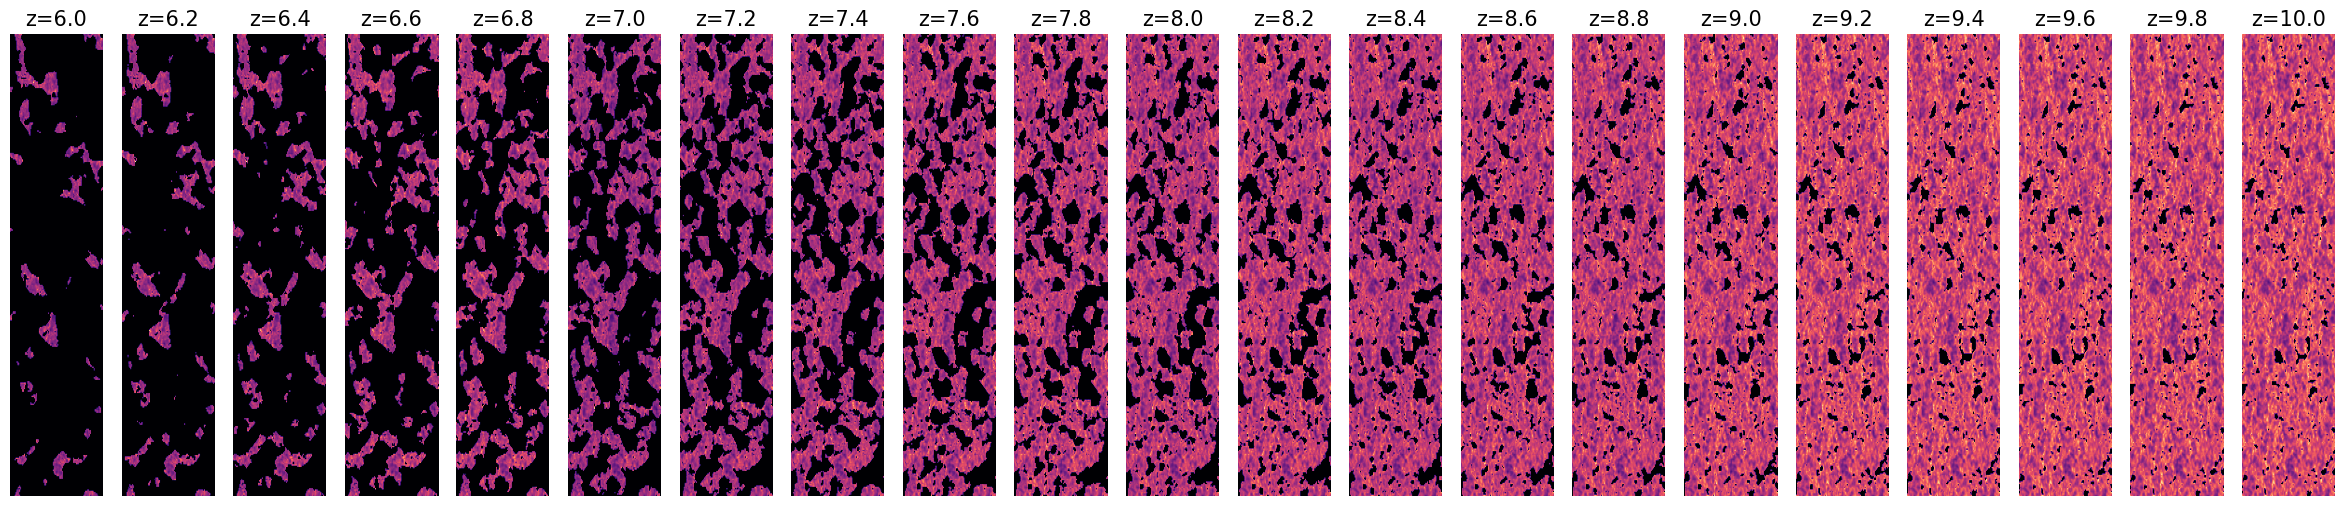

In [9]:
plt.figure(figsize=(30,6))
for i in range(len(coevals)):
    plt.subplot(1,len(coevals),i+1)
    plt.imshow(coevals[i][0,:,:100], cmap='magma', origin='lower', aspect='auto')
    plt.axis('off')
    plt.title(f'z={zs[i]}', fontsize=15)

### Generate Obeservational Lightcone

build and plot physcial lightcone 

In [ ]:

lc_physical,lc_zs = build_physical_lightcone(file_list=file_list, 
                                                redshifts=np.array(zs), 
                                                box_size=box_size)

Making lightcone between 6.000000 < z < 9.999369


100%|██████████| 630/630 [00:03<00:00, 164.07it/s]

...done


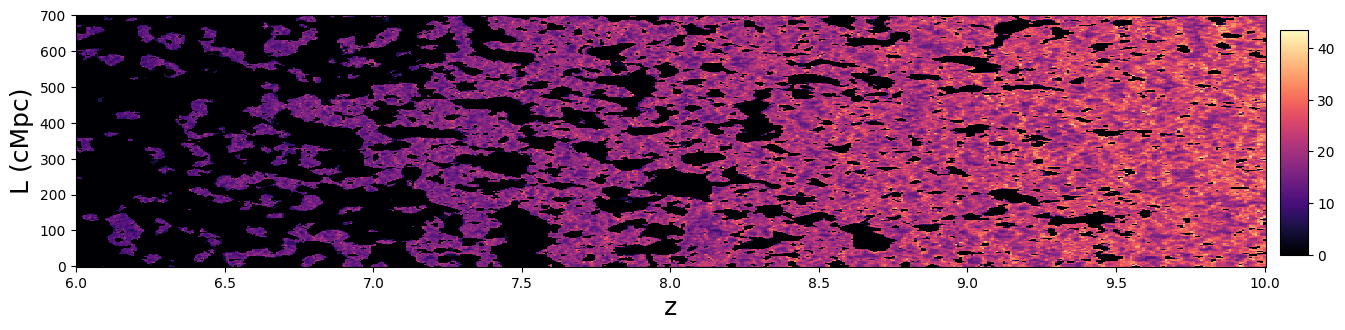

In [11]:
plot_lightcone(lc_physical, lc_zs, box_size,cmap='magma')

add telescope noise and remove slice mean

In [12]:
lc_ns_physical = t2c.noise_lightcone(ncells=350,
                            zs=lc_zs,
                            obs_time=100.0,
                            boxsize=700,
                            total_int_time=4.0,
                            int_time=10.0,
                            declination=-30.0,
                            n_jobs=16,
                            save_uvmap='/home/dante/workspace/sdc/sdc_data/obs/lc_noise_uvmap.pkl',)
lc_physical = lc_physical - np.mean(lc_physical,axis=(0,1))

lc_physical = lc_physical+lc_ns_physical

All or some uv maps is read from the given file. Be sure that they were run with the same parameter values as provided now.
Creating the uv maps.
...done
Creating noise.

z = 6.000 | 0.16 % completed

z = 6.005 | 0.32 % completed

z = 6.009 | 0.48 % completed

z = 6.014 | 0.63 % completed

z = 6.018 | 0.79 % completed

z = 6.023 | 0.95 % completed

z = 6.027 | 1.11 % completed

z = 6.032 | 1.27 % completed

z = 6.036 | 1.43 % completed

z = 6.041 | 1.59 % completed

z = 6.045 | 1.75 % completed

z = 6.050 | 1.90 % completed

z = 6.054 | 2.06 % completed

z = 6.059 | 2.22 % completed

z = 6.064 | 2.38 % completed

z = 6.068 | 2.54 % completed

z = 6.073 | 2.70 % completed

z = 6.077 | 2.86 % completed

z = 6.082 | 3.02 % completed

z = 6.086 | 3.17 % completed

z = 6.091 | 3.33 % completed

z = 6.096 | 3.49 % completed

z = 6.100 | 3.65 % completed

z = 6.105 | 3.81 % completed

z = 6.109 | 3.97 % completed

z = 6.114 | 4.13 % completed

z = 6.119 | 4.29 % completed

z = 6.123 | 4.44 % 


z = 6.882 | 28.57 % completed

z = 6.888 | 28.73 % completed

z = 6.893 | 28.89 % completed

z = 6.898 | 29.05 % completed

z = 6.904 | 29.21 % completed

z = 6.909 | 29.37 % completed

z = 6.915 | 29.52 % completed

z = 6.920 | 29.68 % completed

z = 6.925 | 29.84 % completed

z = 6.931 | 30.00 % completed

z = 6.936 | 30.16 % completed

z = 6.942 | 30.32 % completed

z = 6.947 | 30.48 % completed

z = 6.953 | 30.63 % completed

z = 6.958 | 30.79 % completed

z = 6.964 | 30.95 % completed

z = 6.969 | 31.11 % completed

z = 6.974 | 31.27 % completed

z = 6.980 | 31.43 % completed

z = 6.985 | 31.59 % completed

z = 6.991 | 31.75 % completed

z = 6.996 | 31.90 % completed

z = 7.002 | 32.06 % completed

z = 7.007 | 32.22 % completed

z = 7.013 | 32.38 % completed

z = 7.018 | 32.54 % completed

z = 7.024 | 32.70 % completed

z = 7.030 | 32.86 % completed

z = 7.035 | 33.02 % completed

z = 7.041 | 33.17 % completed

z = 7.046 | 33.33 % completed

z = 7.052 | 33.49 % completed

z = 7.0

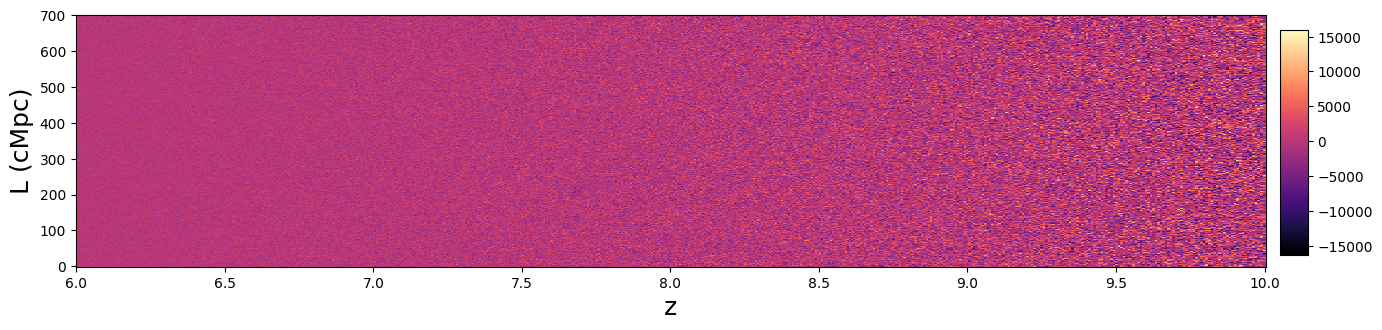

In [13]:
plot_lightcone(lc_physical, lc_zs, box_size,cmap='magma')

Pad the lightcone to fully cover the 8-degree field of view (FoV)

In [14]:
padded_lc_physical = np.pad(lc_physical, pad_width=((120, 120), (120, 120), (0, 0)), mode='reflect')

#build observational lightcones
padded_lc_obs, lc_freqs = build_observational_lightcone(file_list=file_list, 
                                                redshifts=np.array(zs), 
                                                box_size=box_size/350*590,
                                                n_output_cell=512,
                                                physical_lightcone=padded_lc_physical)

7.906929869534547


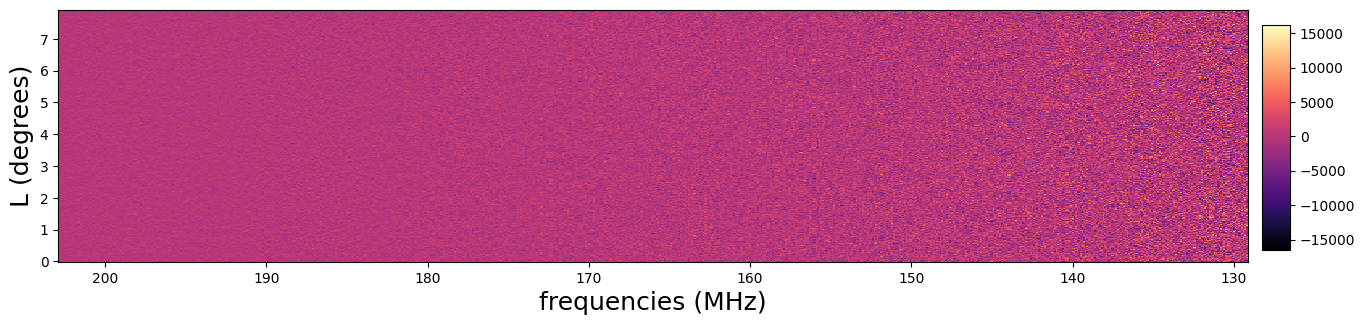

In [15]:
max_deg = np.max(t2c.angular_size_comoving(box_size/350*590, lc_zs))
print(max_deg)
plot_lightcone(padded_lc_obs, lc_freqs, max_deg, type='observational',cmap='magma')

Interpolate the lightcone to match the 2048×2048 spatial resolution used in the SDC, and restrict the frequency range to the interval specified by the SDC.

In [19]:
resampled_lc_obs = zoom(padded_lc_obs, (4, 4, 1), order=1)

resampled_lc_obs_cut = resampled_lc_obs[...,np.logical_and((lc_freqs>151),(lc_freqs<196))]

### Calculate 2d PS

Save the lightcone as a FITS file, as required by `pseor`. The header is adapted from the SDC example file. The 2D power spectrum is computed using the code provided by the SDC team, with several parameter modifications to reflect our simplified treatment of observational effects.

In [ ]:

hdulist = fits.open('/home/dante/workspace/sdc/sdc_data/taregt_data/header_only.fits')
final_data = resampled_lc_obs_cut[...,::-1].transpose(2,0,1)/1000
hdu_new = fits.PrimaryHDU(data=final_data, header=hdulist[0].header.copy())
hdu_new.writeto(f'/home/dante/workspace/sdc/sdc_data/tmp/test_700mpc_lc.fits', overwrite=True)

In [24]:
from ps_eor import datacube, pspec, psutil
def get_ps_gen_square(cube,  **kargs):
    ''' This function return a ps_gen object which will return a power-spectra with the SDC3a binning scheme '''

    z = psutil.freq_to_z(cube.freqs.mean()) 
    du = psutil.k_to_l(0.05, z) / (2 * np.pi) 
    umin = du / 2.
    umax = psutil.k_to_l(0.5, z) / (2 * np.pi) + du / 2 
    M = int((1 / psutil.k_to_delay(0.05, z)) / 0.1e6)
    ps_builder = pspec.PowerSpectraBuilder()
    ps_gen = ps_builder.get(cube,  du=du, umin=umin, umax=umax, uniform_u_bins=True, **kargs)
    ps_gen.eor.M = M
    ps_gen._compute_delays()

    return ps_gen

nulimits = np.array([[151,165.9], [166,180.9], [181,195.9] ]) 
min_freqs=nulimits[:,0]
max_freqs=nulimits[:,1]

img_file='/home/dante/workspace/sdc/sdc_data/tmp/test_700mpc_lc.fits'
all_ps = []
for i in range(0,len(min_freqs)):

    fmin = (min_freqs[i])
    fmax = (max_freqs[i])
    fmin_st=str(fmin)
    fmax_st=str(fmax)
    fmin = (min_freqs[i])*1e6
    fmax = (max_freqs[i])*1e6
    f_ref = (fmax-fmin)/2
    z = psutil.freq_to_z((fmin+f_ref)) 
    kpar_min = 0.05
    mydu = psutil.k_to_l(kpar_min, z) / (2 * np.pi)
    myumin = mydu /2
    myumax = psutil.k_to_l(0.5, z) / (2 * np.pi) + mydu/2
    fmin_base = fmin


    cube_observed = datacube.CartDataCube.load_from_fits_image([img_file],myumin, myumax, np.radians(4), int_time=10, total_time=3600*4,convert_jy2k=False, window_function=datacube.WindowFunction('boxcar'))
    
    with contextlib.redirect_stdout(None):
        cube_observed_zbin = cube_observed.get_slice(fmin, fmax)
        ps_gen_zbin = get_ps_gen_square(cube_observed_zbin, ft_method='nudft', window_fct='hann', rmean_freqs=False)
        
        ps1 = ps_gen_zbin.get_ps2d(cube_observed_zbin)

    nbins = 10
    kpar_bins = ps1.k_par[:nbins]
    kper_bins = ps1.k_per
    ps = ps1.data[:nbins]
    err = ps1.err[:nbins]

    all_ps.append(ps)
    del cube_observed, cube_observed_zbin, ps_gen_zbin, ps1

all_ps = np.array(all_ps)

 Progress: 1 / 1 (Total: 0.00 s) 
 Progress: 1 / 1 (Total: 0.00 s) 
 Progress: 1 / 1 (Total: 0.00 s) 


### Compare to Target Data(PS1 and PS2 from SDC)

In [25]:
Pk_1_z_8 = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/Pk_PS1_151.0_165.9.txt')
Pk_1_z_7 = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/Pk_PS1_166.0_180.9.txt')
Pk_1_z_6 = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/Pk_PS1_181.0_195.9.txt')

Pk_2_z_8 = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/Pk_PS2_151.0_165.9.txt')
Pk_2_z_7 = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/Pk_PS2_166.0_180.9.txt')
Pk_2_z_6 = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/Pk_PS2_181.0_195.9.txt')

bins_par = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/bins_kpar.txt')
bins_per = np.loadtxt('/home/dante/workspace/sdc/sdc_data/taregt_data/PS1_PS2_Data/bins_kper.txt')

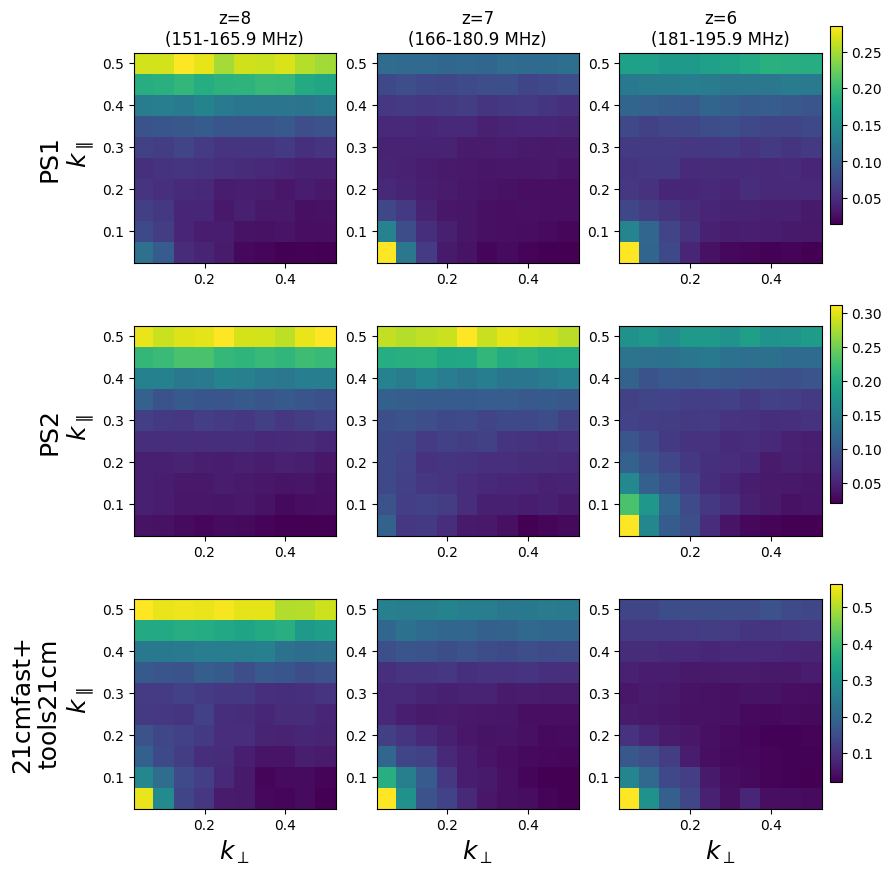

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(8, 9))

# Store image handles for each row
ims = []

# First row
ims.append([
    axs[0,0].pcolor(bins_per, bins_par, Pk_1_z_8.T, cmap='viridis'),
    axs[0,1].pcolor(bins_per, bins_par, Pk_1_z_7.T, cmap='viridis'),
    axs[0,2].pcolor(bins_per, bins_par, Pk_1_z_6.T, cmap='viridis'),
])

# Second row
ims.append([
    axs[1,0].pcolor(bins_per, bins_par, Pk_2_z_8.T, cmap='viridis'),
    axs[1,1].pcolor(bins_per, bins_par, Pk_2_z_7.T, cmap='viridis'),
    axs[1,2].pcolor(bins_per, bins_par, Pk_2_z_6.T, cmap='viridis'),
])

# Third row
ims.append([
    axs[2,0].pcolor(bins_per, bins_par, all_ps[0].T, cmap='viridis'),
    axs[2,1].pcolor(bins_per, bins_par, all_ps[1].T, cmap='viridis'),
    axs[2,2].pcolor(bins_per, bins_par, all_ps[2].T, cmap='viridis'),
])

# Titles
axs[0,0].set_title('z=8\n(151-165.9 MHz)')
axs[0,1].set_title('z=7\n(166-180.9 MHz)')
axs[0,2].set_title('z=6\n(181-195.9 MHz)')

# Axis labels
axs[2,0].set_xlabel(r'$k_\perp$', fontsize=18)
axs[2,1].set_xlabel(r'$k_\perp$', fontsize=18)
axs[2,2].set_xlabel(r'$k_\perp$', fontsize=18)

axs[0,0].set_ylabel('PS1\n $k_\parallel$', fontsize=18)
axs[1,0].set_ylabel('PS2\n $k_\parallel$', fontsize=18)
axs[2,0].set_ylabel('21cmfast+\ntools21cm\n $k_\parallel$', fontsize=18)

# Adjust layout
fig.subplots_adjust(wspace=0.2, hspace=0.3, left=0.06, right=0.92, top=0.95, bottom=0.11)

# Add one colorbar per row
for i in range(3):
    cax = fig.add_axes([0.93, 0.76 - i * 0.31, 0.015, 0.22])  # manually adjust for spacing
    fig.colorbar(ims[i][2], cax=cax)  # use the last image in each row for the color scale

plt.show()


### One more thing: Generate ionization history

Since the goal of the inference is to recover the reionization history, we need to generate the ground-truth neutral fraction at each redshift. To do this, we first generate ionization coeval boxes corresponding to the brightness temperature boxes. These are then used to construct a lightcone of the ionization history, which we divide into three segments to compute the true neutral hydrogen fraction in the three redshift bins.

In [56]:
zs = np.arange(6,10.1,0.2).tolist()
zs = [round(z,1) for z in zs]
box_size = 700

We skip the simulation process since it is very similar to the steps described above. Instead, we load an existing simulation for demonstration purposes.

In [57]:
xH_files_list = natsorted(glob(f'/home/dante/workspace/sdc/sdc_data/train_data_700mpc/0/ionization_fraction/*'))

lc_physical,lc_zs = build_physical_lightcone(file_list=xH_files_list, 
                                                redshifts=np.array(zs), 
                                                box_size=box_size)
xH_from_lightcone = np.array_split(lc_physical, 3,axis=-1)
xH = [np.mean(xH) for xH in xH_from_lightcone]

Making lightcone between 6.000000 < z < 9.999369


100%|██████████| 630/630 [00:04<00:00, 127.53it/s]

...done


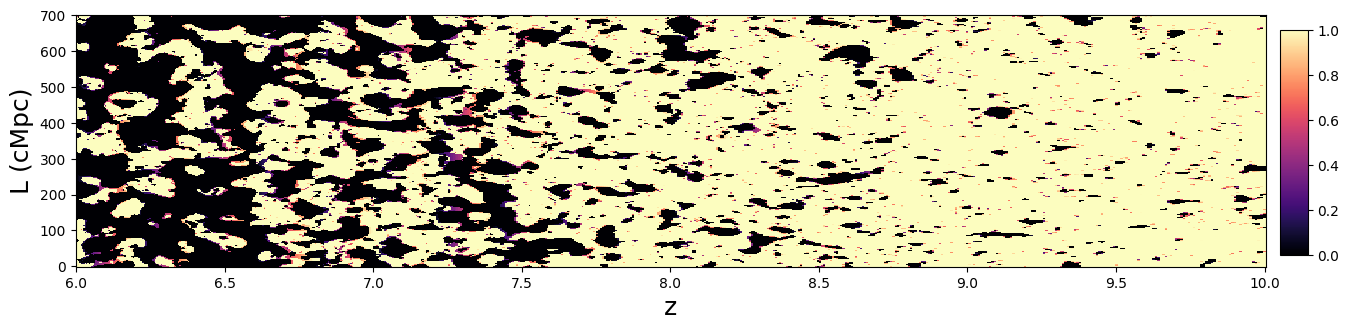

In [59]:
plot_lightcone(lc_physical, lc_zs, box_size,cmap='magma')

Text(0, 0.5, 'Neutral Fraction')

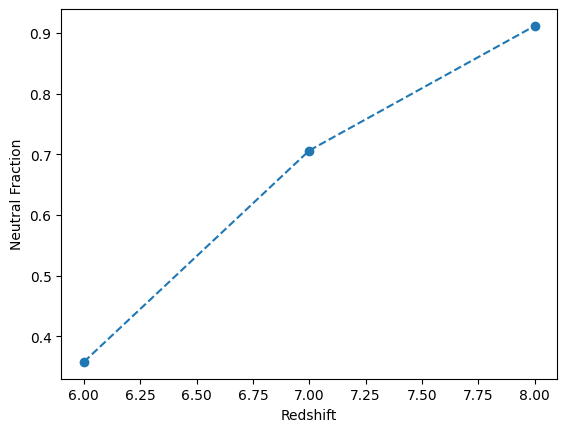

In [62]:
plt.plot(np.array([6,7,8]),xH,'--o')
plt.xlabel('Redshift')
plt.ylabel('Neutral Fraction')